# Import

In [193]:
! pip install category_encoders

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [194]:
! pip install eli5

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import model_preprocessing as mp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import category_encoders
from category_encoders.one_hot import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import eli5
import keras

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [196]:
df = pd.read_csv('verlander.csv')
df.head()

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (131) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,pitch_type,game_date,index,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,stand,p_throws,home_team,away_team,type,bb_type,inning_topbot,sv_id,if_fielding_alignment,score_diff,on_1b_id,ball_high,ball_low,ball_left,ball_right,bases_loaded,batter_swung,in_strikezone,chased,fastball_perc_faced,fastball_chase_perc,fastball_bip_swung_perc,fastball_taken_strike_perc,fastball_est_woba,fastball_babip,fastball_iso_value,breaking_perc_faced,breaking_chase_perc,breaking_bip_swung_perc,breaking_taken_strike_perc,breaking_est_woba,breaking_babip,breaking_iso_value,offspeed_perc_faced,offspeed_chase_perc,offspeed_bip_swung_perc,offspeed_taken_strike_perc,offspeed_est_woba,offspeed_babip,offspeed_iso_value,pitchout_perc_faced,balls,strikes,player_name,events,description,des,pitch_name,of_fielding_alignment,_count,count_cat,pitch_cat,overall_FF_perc,count_cat_FF_perc,overall_SL_perc,count_cat_SL_perc,overall_CU_perc,count_cat_CU_perc,overall_CH_perc,count_cat_CH_perc,overall_FC_perc,count_cat_FC_perc,overall_FT_perc,count_cat_FT_perc,pitch_count,L1_pitch_type,L1_pitch_result,L1_pitch_zone,L5_FF_perc,L5_strike_perc,L5_SL_perc,L5_CU_perc,L5_CH_perc,L5_FC_perc,batting_order_slot,pitcher_AB
0,1510,FF,2018-03-29,22730,94.6,-1.9486,6.8034,592261.0,434378.0,8.0,NaN,2018.0,-0.8339,1.6529,0.2748,1.7070,0.0,0.0,0.0,0.0,1.0,NaN,NaN,435263.0,7.4453,-136.8952,-10.8637,-11.8856,32.3168,-9.8095,3.3339,1.4562,NaN,NaN,NaN,92.490,2652.0,5.498,529411.0,55.0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,R,R,TEX,HOU,S,NaN,Bot,180329_195119,Standard,1.0,NaN,False,False,False,False,0,0,1,0,66.241684,21.138212,42.05021,40.0,0.300159,0.220395,0.098684,26.995565,27.516779,36.70213,43.915344,0.231478,0.2,0.054545,6.76275,36.231884,21.666666,33.962265,0.426231,0.25,0.041667,0.0,0,0,Justin Verlander,NaN,called_strike,NaN,4-Seam Fastball,Standard,0,neutral,fastball,0.583272,0.685385,0.215498,0.163427,0.151046,0.114471,0.039606,0.029518,0.007626,0.005040,0.002952,0.002160,1,FF,first pitch,-1.0,56.076277,54.250162,24.676794,16.305753,2.60181,0.339367,1,False
1,1511,FF,2018-03-29,22711,94.3,-1.9916,6.6522,592261.0,434378.0,14.0,NaN,2018.0,-1.2892,1.4338,0.4047,1.2020,0.0,0.0,0.0,0.0,1.0,NaN,NaN,435263.0,8.9916,-136.5666,-11.4425,-18.0155,31.9642,-12.0415,3.3446,1.4668,NaN,NaN,NaN,93.284,2638.0,6.095,529411.0,54.4034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,R,R,TEX,HOU,B,NaN,Bot,180329_195137,Standard,1.0,NaN,False,True,False,False,0,0,0,0,66.241684,21.138212,42.05021,40.0,0.300159,0.220395,0.098684,26.995565,27.516779,36.70213,43.915344,0.231478,0.2,0.054545,6.76275,36.231884,21.666666,33.962265,0.426231,0.25,0.041667,0.0,0,1,Justin Verlander,NaN,ball,NaN,4-Seam Fastball,Standard,1,ahead,fastball,0.583272,0.493105,0.215498,0.257727,0.151046,0.198288,0.039606,0.039467,0.007626,0.008084,0.002952,0.003329,2,FF,S,8.0,56.076277,54.250162,24.676794,16.305753,2.60181,0.339367,1,False
2,1512,SL,2018-03-29,22699,86.4,-2.1580,6.5734,592261.0,434378.0,14.0,NaN,2018.0,0.2707,0.3526,1.5138,-0.0429,0.0,0.0,0.0,0.0,1.0,NaN,NaN,435263.0,8.0583,-125.1452,-10.0136,1.1868,24.5998,-26.8457,3.3339,1.4562,NaN,NaN,NaN,84.944,2680.0,5.543,529411.0,54.9560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,R,R,TEX,HOU,B,NaN,Bot,180329_195201,Standard,1.0,NaN,False,True,False,True,0,0,0,0,66.241684,21.138212,42.05021,40.0,0.300159,0.220395,0.098684,26.995565,27.516779,36.70213,43.915344,0.231478,0.2,0

# Clean

In [197]:
processor = mp.Preprocess(dataframe = df)
df = processor.process(processor.df)
df.head()

,release_speed,on_3b,on_2b,on_1b,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,stand,p_throws,inning_topbot,score_diff,ball_high,ball_low,ball_left,ball_right,bases_loaded,batter_swung,in_strikezone,chased,fastball_perc_faced,fastball_chase_perc,fastball_bip_swung_perc,fastball_taken_strike_perc,fastball_est_woba,fastball_babip,fastball_iso_value,breaking_perc_faced,breaking_chase_perc,breaking_bip_swung_perc,breaking_taken_strike_perc,breaking_est_woba,breaking_babip,breaking_iso_value,offspeed_perc_faced,offspeed_chase_perc,offspeed_bip_swung_perc,offspeed_taken_strike_perc,offspeed_est_woba,offspeed_babip,offspeed_iso_value,pitchout_perc_faced,overall_FF_perc,count_cat_FF_perc,overall_SL_perc,count_cat_SL_perc,overall_CU_perc,count_cat_CU_perc,overall_CH_perc,count_cat_CH_perc,overall_FC_perc,count_cat_FC_perc,overall_FT_perc,count_cat_FT_perc,L5_FF_perc,L5_strike_perc,L5_SL_perc,L5_CU_perc,L5_CH_perc,L5_FC_perc,pitcher_AB,next_pitch,events_field_out,events_strikeout,events_walk,events_hit_by_pitch,events_triple,events_home_run,events_single,events_double,events_double_play,events_force_out,events_sac_fly,events_field_error,events_grounded_into_double_play,events_strikeout_double_play,events_sac_bunt,events_pickoff_2b,events_catcher_interf,zone_8.0,zone_14.0,zone_5.0,zone_3.0,zone_6.0,zone_9.0,zone_2.0,zone_12.0,zone_11.0,zone_4.0,zone_7.0,zone_1.0,zone_13.0,pitch_type_FF,pitch_type_SL,pitch_type_CH,pitch_type_CU,pitch_type_FC,type_S,type_B,type_X,home_team_TEX,home_team_HOU,home_team_CWS,home_team_ARI,home_team_LAA,home_team_NYY,home_team_OAK,home_team_TB,home_team_LAD,home_team_DET,home_team_BAL,home_team_SEA,home_team_MIN,home_team_CIN,home_team_CLE,away_team_HOU,away_team_BAL,away_team_TEX,away_team_NYY,away_team_SF,away_team_BOS,away_team_TB,away_team_TOR,away_team_CWS,away_team_OAK,away_team_DET,away_team_SEA,away_team_COL,away_team_LAA,away_team_MIN,away_team_ARI,away_team_MIL,pitch_count_1.0,pitch_count_2.0,pitch_count_3.0,pitch_count_4.0,pitch_count_34.0,pitch_count_35.0,pitch_count_36.0,pitch_count_37.0,pitch_count_66.0,pitch_count_67.0,pitch_count_68.0,pitch_count_69.0,pitch_count_70.0,pitch_count_5.0,pitch_count_42.0,pitch_count_43.0,pitch_count_44.0,pitch_count_45.0,pitch_count_79.0,pitch_count_80.0,pitch_count_81.0,pitch_count_71.0,pitch_count_72.0,pitch_count_73.0,pitch_count_38.0,pitch_count_39.0,pitch_count_84.0,pitch_count_85.0,pitch_count_86.0,pitch_count_32.0,pitch_count_33.0,pitch_count_64.0,pitch_count_65.0,pitch_count_102.0,pitch_count_103.0,pitch_count_104.0,pitch_count_105.0,pitch_count_46.0,pitch_count_47.0,pitch_count_82.0,pitch_count_83.0,pitch_count_99.0,pitch_count_6.0,pitch_count_7.0,pitch_count_8.0,pitch_count_9.0,pitch_count_41.0,pitch_count_40.0,pitch_count_51.0,pitch_count_52.0,pitch_count_53.0,pitch_count_75.0,pitch_count_101.0,pitch_count_30.0,pitch_count_31.0,pitch_count_54.0,pitch_count_55.0,pitch_count_90.0,pitch_count_91.0,pitch_count_92.0,pitch_count_93.0,pitch_count_94.0,pitch_count_95.0,pitch_count_96.0,pitch_count_76.0,pitch_count_77.0,pitch_count_100.0,pitch_count_87.0,pitch_count_88.0,pitch_count_48.0,pitch_count_89.0,pitch_count_74.0,pitch_count_63.0,pitch_count_49.0,pitch_count_78.0,pitch_count_50.0,pitch_count_97.0,pitch_count_98.0,pitch_count_56.0,pitch_count_57.0,pitch_count_58.0,pitch_count_10.0,pitch_count_59.0,pitch_count_60.0,pitch_count_61.0,pitch_count_62.0,pitch_count_107.0,pitch_count_108.0,pitch_count_109.0,pitch_count_110.0,pitch_count_11.0,pitch_count_12.0,pitch_count_13.0,pitch_count_14.0,pitch_count_106.0,pitch_count_111.0,pitch_count_112.0,pitch_count_15.0,pitch_count_16.0,pitch_count_17.0,pitch_count_18.0,pitch_count_19.0,pitch_count_20.0,pitch_count_21.0,pitch_count_22.0,pitch_count_23.0,pitch_count_24.0,pitch_count_25.0,pitch_count_113.0,pitch_count_114.0,pitch_count_26.0,pitch_count_27.0,pitch_count_28.0,pitch_count_29.0,pitch_count_115.0,pitch_count_116.0,pitch_count_117.0,pitch_count_118.0,pitch_count_119.0,pitch_count_120.0,pitch

# Create Feature Matrix and Target Vector

In [198]:
feature_matrix = df.drop(columns = ['next_pitch']) #array([[row_1],[row_2],[row_3]])
feature_matrix = feature_matrix.values

target_vector = df['next_pitch'] #array([[FF],[FF],[FC]])
mapping = dict(zip(sorted(target_vector.unique().tolist()), list(range(5))))
target_vector = target_vector.replace(mapping)
target_vector = target_vector.values.reshape(-1, 1)

feature_matrix.shape, target_vector.shape

((6188, 328), (6188, 1))

# Train Test Split

In [199]:
x_train, x_test, y_train, y_test = train_test_split(feature_matrix, target_vector, test_size = .3, shuffle = True)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4331, 328), (1857, 328), (4331, 1), (1857, 1))

# Instantiate Model

[GBC Docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [200]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(64, input_shape=(328,)),
    Activation('relu'),
    Dense(32, input_shape=(328,)),
    Activation('relu'),
    Dense(5),
    Activation('softmax'),
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 64)                21056     
_________________________________________________________________
activation_45 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 32)                2080      
_________________________________________________________________
activation_46 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 5)                 165       
_________________________________________________________________
activation_47 (Activation)   (None, 5)                 0         
Total params: 23,301
Trainable params: 23,301
Non-trainable params: 0
_________________________________________________________________


In [201]:
"""from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

# Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

model.fit(x_train, y_train,
          batch_size=64, epochs=5,
          validation_data=(x_val, y_val))"""

"from keras.models import Sequential\nfrom keras.layers import LSTM, Dense\nimport numpy as np\n\ndata_dim = 16\ntimesteps = 8\nnum_classes = 10\n\n# expected input data shape: (batch_size, timesteps, data_dim)\nmodel = Sequential()\nmodel.add(LSTM(32, return_sequences=True,\n               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32\nmodel.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32\nmodel.add(LSTM(32))  # return a single vector of dimension 32\nmodel.add(Dense(10, activation='softmax'))\n\nmodel.compile(loss='categorical_crossentropy',\n              optimizer='rmsprop',\n              metrics=['accuracy'])\n\n# Generate dummy training data\nx_train = np.random.random((1000, timesteps, data_dim))\ny_train = np.random.random((1000, num_classes))\n\n# Generate dummy validation data\nx_val = np.random.random((100, timesteps, data_dim))\ny_val = np.random.random((100, num_classes))\n\nmodel.fit(x_train, y_

In [202]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [203]:
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=5)
history = model.fit(x_train, one_hot_labels, validation_split=0.35, epochs=50, batch_size=64)

Train on 2815 samples, validate on 1516 samples
Epoch 1/50
2815/2815 [==============================] - 1s 421us/step - loss: 3.5174 - acc: 0.4931 - val_loss: 3.1542 - val_acc: 0.5073
Epoch 2/50
2815/2815 [==============================] - 0s 94us/step - loss: 3.2982 - acc: 0.5293 - val_loss: 3.1186 - val_acc: 0.5673
Epoch 3/50
2815/2815 [==============================] - 0s 93us/step - loss: 1.4014 - acc: 0.5346 - val_loss: 1.1842 - val_acc: 0.4367
Epoch 4/50
2815/2815 [==============================] - 0s 91us/step - loss: 1.1140 - acc: 0.5403 - val_loss: 1.1229 - val_acc: 0.4921
Epoch 5/50
2815/2815 [==============================] - 0s 91us/step - loss: 1.0901 - acc: 0.5563 - val_loss: 1.0543 - val_acc: 0.5792
Epoch 6/50
2815/2815 [==============================] - 0s 97us/step - loss: 1.0585 - acc: 0.5613 - val_loss: 1.0656 - val_acc: 0.5732
Epoch 7/50
2815/2815 [==============================] - 0s 97us/step - loss: 1.0505 - acc: 0.5694 - val_loss: 1.0886 - val_acc: 0.5627
Epoch 

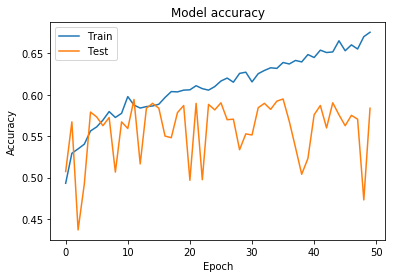

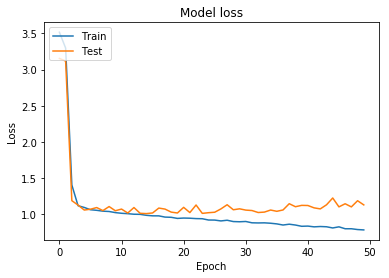

In [204]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


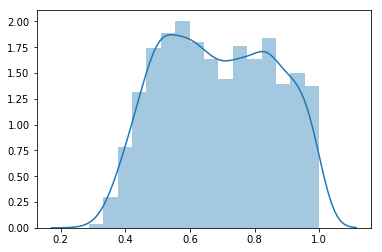

In [205]:
model_probabilities = model.predict(x_test)

Model_Prediction_Probability = []

for _ in range(len(x_test)):
    x = max(model_probabilities[_])
    Model_Prediction_Probability.append(x) 

sns.distplot(Model_Prediction_Probability)
plt.show();

In [206]:
sample = x_test[np.random.randint(x_test.shape[0], size=1), :]

def translate_prediction(sample):
    prediction = model.predict(sample)[0]
    pitches = list(mapping.keys())

    results_map = dict(zip(prediction, pitches))

    return results_map[max(prediction)]

translate_prediction(sample)

'FF'

In [207]:
prediction_probabilities = pd.DataFrame(model.predict(x_test), columns = mapping.keys())
cols = prediction_probabilities.columns.tolist()
prediction_probabilities['a'] = prediction_probabilities[cols].values.argmax(axis=1)
prediction_probabilities['b'] = prediction_probabilities[cols].max(axis=1)
prediction_probabilities['c'] = prediction_probabilities[cols].idxmax(axis=1)
prediction_probabilities.head()

,CH,CU,FC,FF,SL,a,b,c
0,0.004991,0.107360,7.895927e-05,0.492536,0.395034,3,0.492536,FF
1,0.012128,0.088247,9.466528e-06,0.331386,0.568230,4,0.568230,SL
2,0.002956,0.145805,6.630972e-05,0.546560,0.304613,3,0.546560,FF
3,0.001743,0.101986,3.356087e-04,0.296964,0.598972,4,0.598972,SL
4,0.001056,0.015744,2.332536e-07,0.790943,0.192256,3,0.790943,FF


In [208]:
df['next_pitch'].value_counts(normalize = True)

FF    0.560763
SL    0.246768
CU    0.163058
CH    0.026018
FC    0.003394
Name: next_pitch, dtype: float64

In [209]:
prediction_probabilities['c'].value_counts(normalize = True)

FF    0.748519
SL    0.206247
CU    0.042542
CH    0.002693
Name: c, dtype: float64

In [215]:
accuracy_score(y_test, prediction_probabilities['a'])

0.5568120624663435

In [211]:
one_hot_test_labels = keras.utils.to_categorical(y_test, num_classes=5)

loss, acc = model.evaluate(x_test, one_hot_test_labels, batch_size=16)
print("Model, accuracy: {:5.2f}%".format(100*acc))

1857/1857 [==============================] - 0s 136us/step
Model, accuracy: 55.68%


# Export Model

In [212]:
# Save entire model to a HDF5 file
#model.save('my_model.h5')

In [213]:
# Recreate the exact same model, including weights and optimizer.
#new_model = keras.models.load_model('my_model.h5')
#new_model.summary()